<a href="https://colab.research.google.com/github/grjadhav409/Enthalpy-prediction-ML/blob/main/9_enthalpy_model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import libraries**

In [ ]:
#! pip install pycaret

In [ ]:
! pip install lazypredict

In [ ]:
import pandas as pd

In [ ]:

import seaborn as sns
from sklearn.model_selection import train_test_split



## **.data import HC enthalpy**
df

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data2/Enthalpy of formation enthalpy of formation/hydrocarbans/clean_df.csv')
df

,Unnamed: 0,abc,abcgg,n_acid,n_base,sp_abs_a,sp_max_a,sp_diam_a,sp_ad_a,sp_mad_a,...,tsrw10,mw,amw,wpath,wpol,zagreb1,zagreb2,m_zagreb1,m_zagreb2,hfg
0,0,6.36,6.25,0,0,12.05,1.92,3.84,12.05,1.21,...,35.64,142.17,4.44,165,7,34,32,4.00,2.75,-249.70
1,1,5.66,5.72,0,0,10.63,1.90,3.80,10.63,1.18,...,33.97,128.16,4.42,120,6,30,28,3.75,2.50,-228.30
2,2,5.81,6.17,0,0,7.21,2.30,4.61,7.21,0.90,...,37.00,114.14,4.39,58,9,38,40,6.12,1.56,-226.20
3,3,4.95,5.14,0,0,9.52,1.88,3.76,9.52,1.19,...,32.19,114.14,4.39,84,5,26,24,3.50,2.25,-208.40
4,4,4.46,4.74,0,0,7.73,1.93,3.86,7.73,1.10,...,31.34,100.13,4.35,52,4,24,22,3.86,1.83,-195.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,398,1.41,1.41,0,0,2.83,1.41,2.83,2.83,0.94,...,17.31,267.82,53.56,4,0,6,4,2.25,1.00,118.00
399,399,2.12,0.00,0,1,4.00,2.00,3.00,4.00,1.33,...,41.05,43.04,5.38,3,0,12,12,0.75,0.75,126.00
400,400,4.24,4.43,0,0,6.60,2.18,4.35,6.60,1.10,...,33.22,81.06,6.24,29,3,26,28,2.11,1.50,147.30
401,401,10.49,8.84,0,0,17.91,2.47,4.75,17.91,1.38,...,59.27,166.08,7.22,219,19,72,87,2.69,2.83,176.70


In [ ]:
df.drop('Unnamed: 0', axis=1)
X = df.drop('hfg', axis=1)
Y = df.hfg

In [ ]:
X

,Unnamed: 0,abc,abcgg,n_acid,n_base,sp_abs_a,sp_max_a,sp_diam_a,sp_ad_a,sp_mad_a,...,srw10,tsrw10,mw,amw,wpath,wpol,zagreb1,zagreb2,m_zagreb1,m_zagreb2
0,0,6.36,6.25,0,0,12.05,1.92,3.84,12.05,1.21,...,7.47,35.64,142.17,4.44,165,7,34,32,4.00,2.75
1,1,5.66,5.72,0,0,10.63,1.90,3.80,10.63,1.18,...,7.31,33.97,128.16,4.42,120,6,30,28,3.75,2.50
2,2,5.81,6.17,0,0,7.21,2.30,4.61,7.21,0.90,...,9.04,37.00,114.14,4.39,58,9,38,40,6.12,1.56
3,3,4.95,5.14,0,0,9.52,1.88,3.76,9.52,1.19,...,7.13,32.19,114.14,4.39,84,5,26,24,3.50,2.25
4,4,4.46,4.74,0,0,7.73,1.93,3.86,7.73,1.10,...,7.32,31.34,100.13,4.35,52,4,24,22,3.86,1.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,398,1.41,1.41,0,0,2.83,1.41,2.83,2.83,0.94,...,4.17,17.31,267.82,53.56,4,0,6,4,2.25,1.00
399,399,2.12,0.00,0,1,4.00,2.00,3.00,4.00,1.33,...,6.93,41.05,43.04,5.38,3,0,12,12,0.75,0.75
400,400,4.24,4.43,0,0,6.60,2.18,4.35,6.60,1.10,...,8.47,33.22,81.06,6.24,29,3,26,28,2.11,1.50
401,401,10.49,8.84,0,0,17.91,2.47,4.75,17.91,1.38,...,9.60,59.27,166.08,7.22,219,19,72,87,2.69,2.83


## Principal Component Analysis

### Data scaling
PCA requires scaling/normalization of the data to work properly

In [ ]:
#@title
from sklearn.preprocessing import StandardScaler

In [ ]:
#@title
scaler = StandardScaler()

In [ ]:
#@title
X = df.drop('hfg',axis=1)
y = df['hfg']

In [ ]:
#@title
X = scaler.fit_transform(X)

ValueError: ignored

In [ ]:
#@title
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [ ]:
#@title
dfx.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


In [ ]:
#@title
dfx.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


### PCA class import and analysis

In [ ]:
#@title
from sklearn.decomposition import PCA

In [ ]:
#@title
pca = PCA(n_components=None)

In [ ]:
#@title
dfx_pca = pca.fit(dfx)

#### Plot the _explained variance ratio_

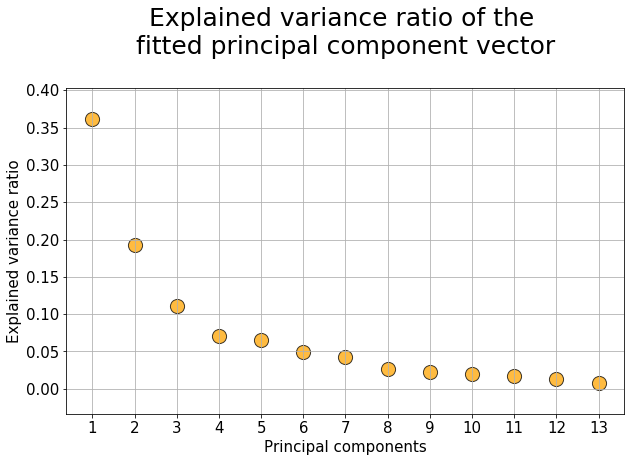

In [ ]:
#@title
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

**The above plot means that the $1^{st}$ principal component explains about 36% of the total variance in the data and the $2^{nd}$ component explians further 20%. Therefore, if we just consider first two components, they together explain 56% of the total variance.**

### Showing better class separation using principal components

#### Transform the scaled data set using the fitted PCA object

In [ ]:
#@title
dfx_trans = pca.transform(dfx)

#### Put it in a data frame

In [ ]:
#@title
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0.401654,0.394893,-0.152146,-0.101996,0.405585,-0.379433,0.145155
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0.052891,-0.371934,-0.457016,1.016563,-0.442433,0.141230,-0.271778
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0.032376,0.232979,0.123370,0.735600,0.293555,0.379663,-0.110164
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0.125285,-0.499578,0.606589,0.174107,-0.508933,-0.635249,0.142084
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,-0.874352,0.150580,0.230489,0.179420,0.012478,0.550327,-0.042455


#### Plot the first two columns of this transformed data set with the color set to original ground truth class label

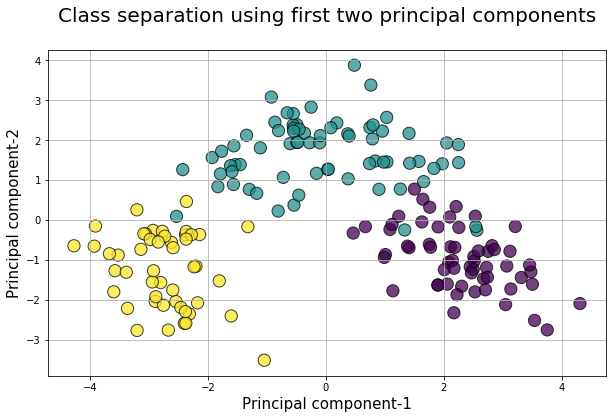

In [ ]:
#@title
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [ ]:
#@title


## data import dataproffessor

In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv


--2022-03-17 11:57:46--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2022-03-17 11:57:46--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

In [ ]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')


In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

# **model building 1 (LazyRegressor)**

## **Data pre-processing**

In [ ]:
# Examine X dimension
X.shape

(403, 1217)

In [ ]:
# Remove low variance features
"""
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape
"""

'\nfrom sklearn.feature_selection import VarianceThreshold\nselection = VarianceThreshold(threshold=(.8 * (1 - .8)))    \nX = selection.fit_transform(X)\nX.shape\n'

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

## **. Compare ML algorithms**

In [ ]:
X_train.shape , X_test.shape, Y_train.shape, Y_test.shape

((322, 1217), (81, 1217), (322,), (81,))

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:00<00:00, 186610.98it/s]


In [ ]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
SGDRegressor,13800388667672004608.00,-38520711047458308096.00,1299002361582.55,0.12
Lars,862434979833898.75,-2407295146203028.50,10268983668.28,3.51
LassoLarsIC,1.36,0.00,209.30,0.15
LarsCV,1.36,0.00,209.30,19.72
DummyRegressor,1.36,0.00,209.30,0.06
NuSVR,1.35,0.03,205.74,0.29
SVR,1.34,0.04,204.81,0.48
KNeighborsRegressor,1.09,0.76,102.67,1.12
KernelRidge,1.04,0.88,71.14,0.22


In [ ]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


## **. Data visualization of model performance**

[(0.0, 1.0)]

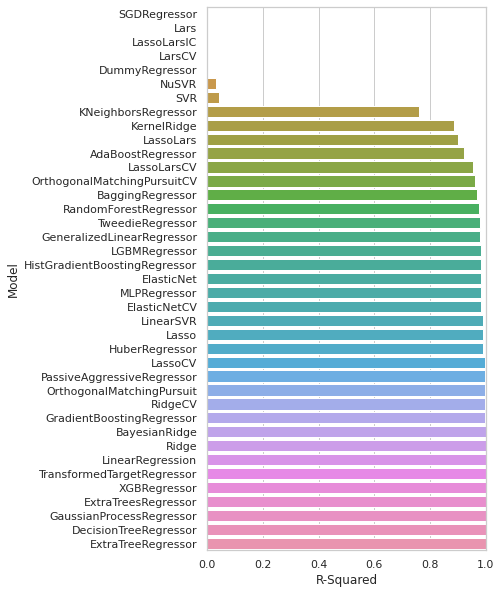

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

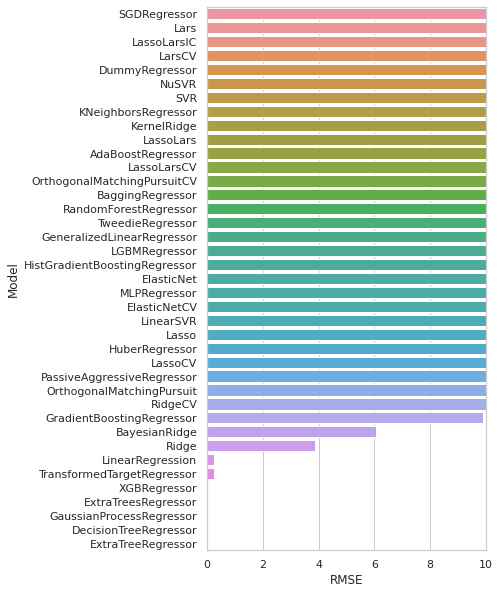

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

In [ ]:
# Bar plot of calculation time
"""
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10)
"""

'\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\nplt.figure(figsize=(5, 10))\nsns.set_theme(style="whitegrid")\nax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)\nax.set(xlim=(0, 10)\n'

# **Model Building 2 (pycaret)** 

### **3.1. Model Setup**

In [ ]:
! pip install pycaret

In [ ]:
from pycaret.regression import *
model = setup(data = df, target = 'hfg', session_id=123) 

### **3.2. Model comparison**

Subsequent blocks of codes here will be using the ``training set`` (the 80% subset) for model building.

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,43.6236,4727.0557,66.5585,0.8775,0.6662,0.9153,2.413
llar,Lasso Least Angle Regression,50.5658,5072.3443,69.1009,0.8744,0.7302,0.8615,0.389
en,Elastic Net,44.7738,5383.8034,69.2869,0.8559,0.7518,0.8987,0.171
lightgbm,Light Gradient Boosting Machine,48.6648,5860.6291,74.2993,0.8557,0.6589,1.0388,0.618
et,Extra Trees Regressor,43.9042,6114.7543,74.0336,0.8453,0.6120,0.8502,3.030
rf,Random Forest Regressor,53.7510,6645.3149,79.9593,0.8190,0.7416,1.2291,5.014
ada,AdaBoost Regressor,61.9035,6929.2395,81.4958,0.8148,0.8570,1.1515,1.067
lasso,Lasso Regression,43.9381,6572.6631,74.2279,0.8058,0.6985,0.8295,0.161
br,Bayesian Ridge,46.6266,8286.0872,81.8014,0.7948,0.7037,0.9392,1.095
omp,Orthogonal Matching Pursuit,50.2740,9289.9958,88.6975,0.7731,0.7406,0.8499,0.061


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### **3.3. Model Creation**

In [ ]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,46.7532,4589.1558,67.7433,0.8986,1.0456,2.2177
1,25.3942,1078.8208,32.8454,0.9782,0.5428,0.4502
2,40.2316,4419.4955,66.4793,0.9127,0.3699,0.3124
3,35.9768,2544.3117,50.4412,0.9303,0.4519,0.3135
4,51.0454,4553.6425,67.4807,0.9221,0.6852,0.8067
5,36.3022,5065.3439,71.1712,0.7812,0.8598,1.6326
6,45.4100,4336.0973,65.8490,0.8801,0.4925,0.5950
7,42.9437,4261.9850,65.2839,0.7712,0.6586,1.5967
8,72.6971,11107.6037,105.3926,0.8486,0.6152,0.6033
9,39.4816,5314.1011,72.8979,0.8516,0.9402,0.6250


### **3.4. Model Tuning**

The learning parameters are subjected to optimization at this phase. Here, 50 iterations is used for the optimization process and the fitness function is the Mean Absolute Error (MAE) which is the performance metric used to judge at which learning parameter settings are optimal. 

In [ ]:
tuned_gbr = tune_model('gbr', n_iter = 50, optimize = 'MAE')

TypeError: ignored

In [ ]:
print(tuned_et)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                    max_depth=40, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=280, n_jobs=None, oob_score=False,
                    random_state=7903, verbose=0, warm_start=False)


### **4. Model Analysis**

#### **4.1. Plot Models**
In this tutorial, we are performing regression and so further details of the regression plots are available at https://pycaret.org/plot-model/.

**Residuals Plot**

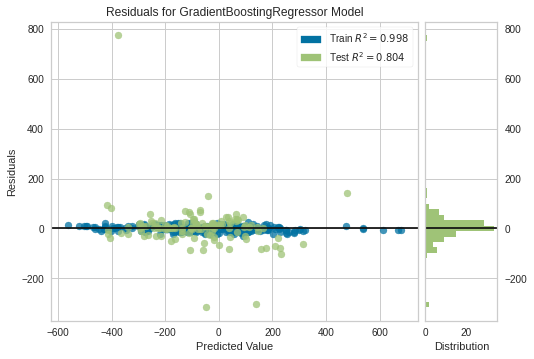

In [ ]:
plot_model(gbr, 'residuals')

**Prediction Error Plot**

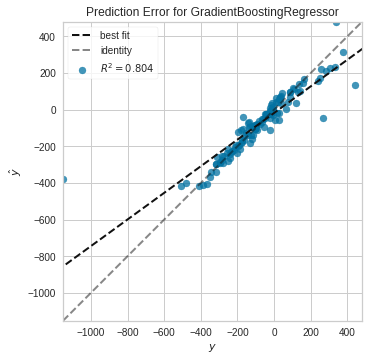

In [ ]:
plot_model(gbr, 'error')

**Cooks Distance Plot**

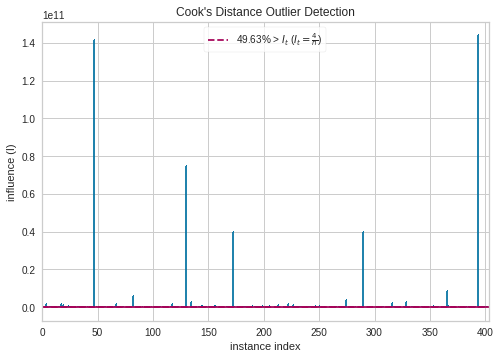

In [ ]:
plot_model(gbr, 'cooks')

**Recursive Feature Selection**

In [ ]:
plot_model(gbr, 'rfe')

IntProgress(value=0, description='Processing: ', max=5)

**Learning Curve**

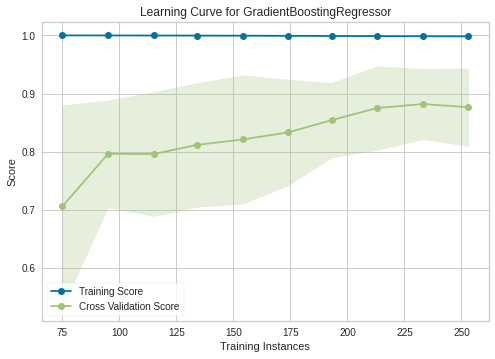

In [ ]:
plot_model(gbr, 'learning')

**Validation Curve**

In [ ]:
plot_model(gbr, 'vc')

**Manifold Learning**

In [ ]:
plot_model(gbr, 'manifold')

**Feature Importance**

In [ ]:
plot_model(gbr, 'feature')

**Model Hyperparameter**

The hyperparameter of the learning model is displayed using the ``parameter`` argument in inside the ``plot_model()`` function.

In [ ]:
plot_model(gbr, 'parameter')

Here, the hyperparameter of the tuned model is 

displayed below.

In [ ]:
#plot_model(tuned_et, 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0
criterion,mae
max_depth,40
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,1


**Show all plots**

The ``evaluate_model()`` displays all available plots here.

In [ ]:
evaluate_model(gbr)

#### **4.2. Model Interpretaion**

The ``interpret_model()`` function of PyCaret leverages the use of the SHAP library to produce stunning plots for depicting the **SHAP (SHapley Additive exPlanations)** values that was originally proposed by Lundberg and Lee in 2016.$^5$ In a nutshell, SHAP plots adds interpretability to constructed models so that the contribution of each features to the prediction can be elucidated.

**Summary Plot**

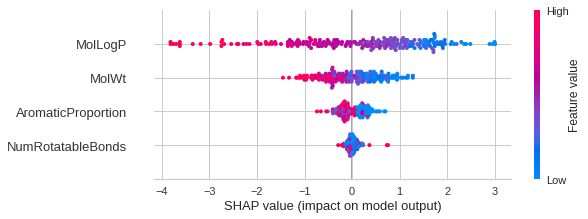

In [ ]:
interpret_model(et)

**Correlation Plot**

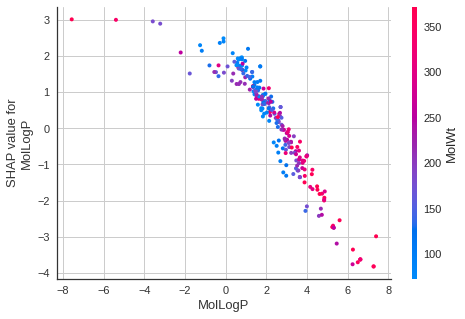

In [ ]:
interpret_model(et, plot = 'correlation')

**Reason Plot at Observation Level**

The *Reason Plot at Observation Level* as called by PyCaret is better known as the **force plot** and this plot essentially describes the ***push and pull effect*** that each individual features has on the **base value** that eventually leads to the predicted **output value**.

In [ ]:
interpret_model(et, plot = 'reason', observation = 10)

### **6.6. External Testing**

We will now apply the trained model (built with 80% subset) to evaluate on the so-called **"hold-out"** testing set (the 20% subset) that serves as the unseen data.

In [ ]:
prediction_holdout = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.5274,0.5405,0.7352,0.8671,0.1973,-0.2672


In [ ]:
prediction_holdout.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS,Label
0,4.87188,293.414,4.0,0.545455,-5.47,-5.0870
1,2.59540,167.850,0.0,0.000000,-2.18,-1.9772
2,3.53712,162.276,0.0,0.500000,-5.23,-4.1647
3,1.34960,116.160,3.0,0.000000,-1.36,-1.3400
4,3.51410,215.362,3.0,0.000000,-3.40,-3.7009


---

# **model building 3 official pycarret**

## 5.0 Setting up Environment in PyCaret

In the previous tutorial __[Regression (REG101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb)__ we learned how to initialize the environment in pycaret using `setup()`. No additional parameters were passed in our last example as we did not perform any pre-processing steps (other than those that are imperative for machine learning experiments which were performed automatically by PyCaret). In this example we will take it to the next level by customizing the pre-processing pipeline using `setup()`. Let's look at how to implement all the steps discussed in section 4 above.

In [ ]:
! pip install pycaret

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

# to display interactive visualisations

ModuleNotFoundError: ignored

In [ ]:
from pycaret.regression import *

In [ ]:
exp_reg102 = setup(data = data,
                   target = 'Price',
                   session_id=123,
                  normalize = True,
                   transformation = True,
                   feature_selection = True,
                   pca = True, 
                   pca_components = 10,
                   multicollinearity_threshold = 0.95) 

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 39)"


Note that this is the same setup grid that was shown in __[Regression Tutorial (REG101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb)__. The only difference here is the customization parameters that were passed to `setup()` are now set to `True`. Also notice that the `session_id` is the same as the one used in the beginner tutorial, which means that the effect of randomization is completely isolated. Any improvements we see in this experiment are solely due to the pre-processing steps taken in `setup()` or any other modeling techniques used in later sections of this tutorial.

## 6.0 Comparing All Models

Similar to __[Regression Tutorial (REG101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb)__ we will also begin this tutorial with `compare_models()`. We will then compare the below results with the last experiment.

In [ ]:
top3 = compare_models(exclude = ['ransac'], n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,708.8055,2492075.9705,1539.2702,0.9754,0.0749,0.0545,2.7800
xgboost,Extreme Gradient Boosting,775.3881,2808497.1625,1640.2397,0.9728,0.0807,0.0589,0.2940
lightgbm,Light Gradient Boosting Machine,766.0853,3116466.5642,1704.0975,0.9704,0.0799,0.0576,0.0460
rf,Random Forest Regressor,850.2817,3268110.2457,1770.5503,0.9686,0.0904,0.0657,0.4640
huber,Huber Regressor,940.6199,3651906.6533,1891.7126,0.9640,0.0972,0.0708,0.1150
ridge,Ridge Regression,952.2530,3846277.3250,1934.6313,0.9624,0.0971,0.0715,0.0180
br,Bayesian Ridge,956.6502,3999159.6452,1967.8153,0.9608,0.0972,0.0716,0.0190
lr,Linear Regression,960.2938,4046533.1500,1978.6945,0.9604,0.0973,0.0717,0.1820
et,Extra Trees Regressor,964.0365,4407851.6806,2061.4017,0.9569,0.1054,0.0758,0.5350
dt,Decision Tree Regressor,1002.3791,4693069.5462,2138.8882,0.9538,0.1086,0.0780,0.0190


Notice that we have used `n_select` parameter within `compare_models`. In last tutorial you have seen that compare_models by default returns the best performing model (single model based on default sort order). However you can use `n_select` parameter to return top N models. In this example `compare_models` has returned Top 3 models.

In [ ]:
type(top3)

list

In [ ]:
print(top3)

[PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=<catboost.core.CatBoostRegressor object at 0x00000170085DCCC0>,
                                task_type='CPU', verbose=False), PowerTransformedTargetRegressor(base_score=None, booster='gbtree',
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, gamma=None, gpu_id=None,
                                importance_type='gain',
                                interaction_constraints=None,
                                learning_rate=None, max_delta_step=None,
                                max_depth=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
          

For the purpose of comparison we will use the `RMSLE` score. Notice how drastically a few of the algorithms have improved after we performed a few pre-processing steps in `setup()`. 
- Linear Regression RMSLE improved from `0.6690` to `0.0973`
- Ridge Regression RMSLE improved from `0.6689` to `0.0971`
- Huber Regression RMSLE improved from `0.4333` to `0.0972`

To see results for all of the models from the previous tutorial refer to Section 7 in __[Regression Tutorial (REG101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb)__.

## 7.0 Create a Model

In the previous tutorial __[Regression (REG101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb)__ we learned how to create a model using the `create_model()` function. Now we will learn about a few other parameters that may come in handy. In this section, we will create all models using 5 fold cross validation. Notice how the `fold` parameter is passed inside `create_model()` to achieve this.

### 7.1 Create Model (with 5 Fold CV)

In [ ]:
dt = create_model('dt', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1011.2651,5098042.2411,2257.8845,0.9540,0.1069,0.0771
1,1002.9714,4289729.8334,2071.1663,0.9570,0.1067,0.0789
2,1002.9420,6074744.0485,2464.6996,0.9385,0.1088,0.0783
3,966.4307,3299744.3840,1816.5199,0.9645,0.1091,0.0787
4,1109.5188,10745091.7087,3277.9707,0.8962,0.1177,0.0802
Mean,1018.6256,5901470.4431,2377.6482,0.9420,0.1098,0.0786
SD,48.0231,2588546.8457,498.2566,0.0244,0.0041,0.0010


### 7.2 Create Model (Metrics rounded to 2 decimals points)

In [ ]:
rf = create_model('rf', round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,827.12,2367714.94,1538.74,0.97,0.09,0.07
1,932.90,6257192.34,2501.44,0.95,0.09,0.06
2,808.00,2380387.73,1542.85,0.98,0.09,0.06
3,829.33,1816996.40,1347.96,0.98,0.09,0.07
4,803.02,2027001.24,1423.73,0.97,0.09,0.07
5,899.67,5551494.15,2356.16,0.95,0.09,0.06
6,899.23,3507186.77,1872.75,0.97,0.09,0.07
7,819.22,2499508.41,1580.98,0.97,0.09,0.07
8,804.13,2966084.29,1722.23,0.97,0.09,0.06
9,880.19,3307536.18,1818.66,0.97,0.10,0.07


Notice how passing the `round` parameter inside `create_model()` has rounded the evaluation metrics to 2 decimals.

### 7.3 Create Model (KNN)

In [ ]:
knn = create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3254.4923,38773273.3698,6226.8189,0.5743,0.3749,0.2306
1,3834.1424,65171546.3255,8072.8896,0.5005,0.4376,0.2928
2,3403.3240,48313575.8656,6950.7968,0.5569,0.4074,0.2705
3,3350.6552,38518982.0900,6206.3663,0.5750,0.3888,0.2577
4,3196.6928,34982366.4238,5914.5893,0.5637,0.4034,0.2820
5,3043.3822,39239011.1734,6264.1050,0.6651,0.3841,0.2501
6,3573.7008,59454145.1936,7710.6514,0.4414,0.4151,0.2603
7,3257.3364,37205003.8114,6099.5905,0.5295,0.4161,0.2676
8,3149.6089,34857672.6574,5904.0387,0.6577,0.3484,0.2388
9,3253.8450,39834155.5362,6311.4305,0.6207,0.4107,0.2881


In [ ]:
print(knn)

PowerTransformedTargetRegressor(algorithm='auto', leaf_size=30,
                                metric='minkowski', metric_params=None,
                                n_jobs=-1, n_neighbors=5, p=2,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                regressor=KNeighborsRegressor(algorithm='auto',
                                                              leaf_size=30,
                                                              metric='minkowski',
                                                              metric_params=None,
                                                              n_jobs=-1,
                                                              n_neighbors=5,
                                                              p=2,
                                                              weights='uniform'),
                                weights='unifo

## 8.0 Tune a Model

In the previous tutorial __[Regression (REG101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb)__ we learned how to automatically tune the hyperparameters of a model using pre-defined grids. Here we will introduce the the `n_iter` parameter in `tune_model()`. `n_iter` is the number of iterations within a random grid search. For every iteration, the model randomly selects one value from a pre-defined grid of hyperparameters. By default, the parameter is set to `10` which means there would be a maximum of 10 iterations to find the best value for hyperparameters. Increasing the value may improve the performance but will also increase the training time. See the example below:

In [ ]:
tuned_knn = tune_model(knn)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2147.6416,24591079.0657,4958.9393,0.7300,0.3007,0.1553
1,2845.0366,41527649.8073,6444.1950,0.6817,0.3557,0.1988
2,2510.7885,41911556.7573,6473.9136,0.6156,0.3389,0.1781
3,2642.8821,32553599.5501,5705.5762,0.6408,0.3395,0.1820
4,2358.5821,29310501.6435,5413.9174,0.6344,0.3297,0.1848
5,2398.9496,40336126.4484,6351.0729,0.6557,0.3165,0.1773
6,2597.6844,48332856.3524,6952.1836,0.5459,0.3329,0.1673
7,2335.7423,28743079.1841,5361.2572,0.6365,0.3427,0.1759
8,2533.9681,33660808.0841,5801.7935,0.6694,0.2921,0.1576
9,2446.9586,32173337.3718,5672.1546,0.6936,0.3270,0.1961


In [ ]:
tuned_knn2 = tune_model(knn, n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2108.3491,23201486.8012,4816.7922,0.7453,0.2893,0.1529
1,2882.1901,42232297.0796,6498.6381,0.6763,0.3694,0.2075
2,2412.5226,39986446.7037,6323.4837,0.6333,0.3299,0.1740
3,2644.6452,32471082.4721,5698.3403,0.6417,0.3415,0.1878
4,2347.7756,29102773.4567,5394.6986,0.6370,0.3421,0.1921
5,2198.6207,27881561.9624,5280.2994,0.7620,0.2958,0.1719
6,2605.5384,47783952.2747,6912.5937,0.5511,0.3354,0.1664
7,2419.6011,28931961.9186,5378.8439,0.6341,0.3511,0.1854
8,2385.9747,28566622.4865,5344.7753,0.7195,0.2798,0.1559
9,2445.4325,32674838.8656,5716.1909,0.6889,0.3329,0.1978


Notice how two tuned K Nearest Neighbors were created based on the `n_iter` parameter. In `tuned_knn`, the `n_iter` parameter is left to the default value and resulted in R2 of `0.6504`. In `tuned_knn2`, the `n_iter` parameter was set to `50` and the R2 improved to `0.6689`. Observe the differences between the hyperparameters of `tuned_knn` and `tuned_knn2` below:

In [ ]:
plot_model(tuned_knn, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,9
p,2
weights,distance
power_transformer_method,box-cox
power_transformer_standardize,True


In [ ]:
plot_model(tuned_knn2, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,euclidean
metric_params,None
n_jobs,-1
n_neighbors,6
p,2
weights,distance
power_transformer_method,box-cox
power_transformer_standardize,True


## 9.0 Ensemble a Model

Ensembling is a common machine learning technique used to improve the performance of models (mostly tree based). There are various techniques for ensembling that we will cover in this section. These include Bagging and Boosting __[(Read More)](https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205)__. We will use the `ensemble_model()` function in PyCaret which ensembles the trained base estimators using the method defined in the `method` parameter.

In [ ]:
# lets create a simple dt
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,990.7311,3452087.6409,1857.9795,0.9621,0.1082,0.0784
1,1003.5928,5974333.4760,2444.2450,0.9542,0.1006,0.0733
2,1072.0395,5624100.1012,2371.5185,0.9484,0.1143,0.0821
3,957.9666,3199436.7363,1788.6969,0.9647,0.1025,0.0770
4,982.4130,4371744.1854,2090.8716,0.9455,0.1189,0.0809
5,932.6466,5733572.2818,2394.4879,0.9511,0.0962,0.0709
6,1024.7338,4130405.4241,2032.3399,0.9612,0.1108,0.0797
7,968.4182,3470199.5490,1862.8472,0.9561,0.1095,0.0801
8,885.1288,2911378.2441,1706.2761,0.9714,0.1021,0.0732
9,1206.1210,8063437.8229,2839.6193,0.9232,0.1233,0.0846


### 9.1 Bagging

In [ ]:
bagged_dt = ensemble_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,849.4748,3027621.5993,1740.0062,0.9668,0.0915,0.0672
1,933.2433,6195361.4290,2489.0483,0.9525,0.0880,0.0644
2,844.0390,3678395.0132,1917.9142,0.9663,0.0897,0.0651
3,827.7642,1835711.3755,1354.8843,0.9797,0.0886,0.0683
4,830.3127,2144026.7668,1464.2496,0.9733,0.0970,0.0697
5,907.7377,5389385.4023,2321.5050,0.9540,0.0911,0.0654
6,940.6783,4800962.9470,2191.1100,0.9549,0.0936,0.0667
7,856.0980,2812959.1622,1677.1879,0.9644,0.0929,0.0673
8,872.8414,3557086.9912,1886.0241,0.9651,0.0949,0.0667
9,916.7984,3698444.0347,1923.1339,0.9648,0.1045,0.0729


In [ ]:
# check the parameter of bagged_dt
print(bagged_dt)

PowerTransformedTargetRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                     criterion='mse',
                                                                     max_depth=None,
                                                                     max_features=None,
                                                                     max_leaf_nodes=None,
                                                                     min_impurity_decrease=0.0,
                                                                     min_impurity_split=None,
                                                                     min_samples_leaf=1,
                                                                     min_samples_split=2,
                                                                     min_weight_fraction_leaf=0.0,
                                                                     presort='deprecated',
        

Notice how ensembling has improved the `RMSLE` from `0.1082` to `0.0938`. In the above example we have used the default parameters of `ensemble_model()` which uses the `Bagging` method. Let's try `Boosting` by changing the `method` parameter in `ensemble_model()`. See example below: 

### 9.2 Boosting

In [ ]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,886.6468,2552655.2750,1597.7031,0.9720,0.0983,0.0723
1,1025.1924,6731578.5824,2594.5286,0.9484,0.0970,0.0705
2,900.0017,4901816.3895,2214.0046,0.9550,0.0927,0.0676
3,977.9167,3384193.0721,1839.6176,0.9627,0.1025,0.0768
4,949.0684,3782150.8323,1944.7753,0.9528,0.1099,0.0779
5,969.5532,7847973.2617,2801.4234,0.9330,0.0991,0.0691
6,964.5278,3884831.5166,1970.9976,0.9635,0.0971,0.0704
7,846.7762,2174257.2296,1474.5363,0.9725,0.0940,0.0707
8,848.3080,2789793.0065,1670.2673,0.9726,0.0940,0.0682
9,991.1647,4734708.4520,2175.9385,0.9549,0.1116,0.0764


Notice how easy it is to ensemble models in PyCaret. By simply changing the `method` parameter you can do bagging or boosting which would otherwise have taken multiple lines of code. Note that `ensemble_model()` will by default build `10` estimators. This can be changed using the `n_estimators` parameter. Increasing the number of estimators can sometimes improve results. See an example below:

In [ ]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,828.6424,2462713.5776,1569.3035,0.9730,0.0897,0.0660
1,922.2578,6129373.0829,2475.7571,0.9530,0.0875,0.0634
2,811.9583,2403737.9298,1550.3993,0.9780,0.0863,0.0643
3,838.2974,1882830.1096,1372.1626,0.9792,0.0888,0.0682
4,812.0108,2195364.1628,1481.6761,0.9726,0.0936,0.0674
5,895.9697,5568439.3809,2359.7541,0.9525,0.0899,0.0637
6,918.0721,4126036.3621,2031.2647,0.9612,0.0910,0.0659
7,819.7846,2431995.5035,1559.4857,0.9692,0.0898,0.0658
8,812.8457,3082258.8271,1755.6363,0.9697,0.0910,0.0641
9,884.5120,3405388.0629,1845.3694,0.9676,0.1032,0.0712


Notice how increasing the n_estimators parameter has improved the result. The bagged_dt model with the default `10` estimators resulted in a RMSLE of `0.0996` whereas in bagged_dt2 where `n_estimators = 50` the RMSLE improved to `0.0911`.

### 9.3 Blending

Blending is another common technique for ensembling that can be used in PyCaret. It creates multiple models and then averages the individual predictions to form a final prediction. Let's see an example below:

In [ ]:
# train individual models to blend
lightgbm = create_model('lightgbm', verbose = False)
dt = create_model('dt', verbose = False)
lr = create_model('lr', verbose = False)

In [ ]:
# blend individual models
blender = blend_models(estimator_list = [lightgbm, dt, lr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,720.6507,1539807.7595,1240.8899,0.9831,0.0791,0.0594
1,826.5039,3809702.4546,1951.8459,0.9708,0.0759,0.0569
2,761.9634,2948787.0835,1717.2033,0.9730,0.0795,0.0599
3,729.2915,1478819.1474,1216.0671,0.9837,0.0760,0.0591
4,689.9662,1592749.4759,1262.0418,0.9801,0.0810,0.0586
5,753.6933,3676542.5375,1917.4312,0.9686,0.0766,0.0554
6,850.0921,2695722.1883,1641.8655,0.9747,0.0864,0.0640
7,773.7834,2209680.2603,1486.4993,0.9721,0.0817,0.0607
8,697.7342,1709748.8518,1307.5737,0.9832,0.0772,0.0567
9,861.3020,3358470.7572,1832.6131,0.9680,0.0925,0.0648


In [ ]:
# blend top3 models from compare_models
blender_top3 = blend_models(top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,665.2764,1449989.3481,1204.1550,0.9841,0.0754,0.0550
1,778.9661,4094787.9434,2023.5582,0.9686,0.0723,0.0529
2,695.0246,2477142.5031,1573.8941,0.9773,0.0744,0.0548
3,660.8897,1204855.9417,1097.6593,0.9867,0.0705,0.0538
4,664.6233,1824243.7836,1350.6457,0.9772,0.0743,0.0539
5,746.6407,4458121.5378,2111.4264,0.9620,0.0748,0.0530
6,772.9459,2502601.4480,1581.9613,0.9765,0.0793,0.0577
7,683.3106,1777844.5113,1333.3584,0.9775,0.0742,0.0536
8,642.6102,1387718.0622,1178.0145,0.9864,0.0709,0.0531
9,751.0474,2361295.2683,1536.6507,0.9775,0.0859,0.0598


In [ ]:
print(blender_top3.estimators_)

[<catboost.core.CatBoostRegressor object at 0x000001700BAAD2E8>, XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameters=1, verbosity=0), LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              r

Now that we have created a `VotingRegressor` using the `blend_models()` function. The model returned by the `blend_models` function is just like any other model that you would create using `create_model()` or `tune_model()`. You can use this model for predictions on unseen data using `predict_model()` in the same way you would for any other model.

### 9.4 Stacking

Stacking is another popular technique for ensembling but is less commonly implemented due to practical difficulties. Stacking is an ensemble learning technique that combines multiple models via a meta-model. Another way to think about stacking is that multiple models are trained to predict the outcome and a meta-model is created that uses the predictions from those models as an input along with the original features. The implementation of `stack_models()` is based on Wolpert, D. H. (1992b). Stacked generalization __[(Read More)](https://www.sciencedirect.com/science/article/abs/pii/S0893608005800231)__. 

Let's see an example below using the top 3 models we have obtained from `compare_models`:

In [ ]:
stacker = stack_models(top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,635.1220,1287310.2325,1134.5969,0.9859,0.0733,0.0533
1,763.7071,3254094.7466,1803.9110,0.9751,0.0714,0.0525
2,703.8437,3505172.7168,1872.2106,0.9679,0.0739,0.0542
3,658.4916,1187367.5050,1089.6639,0.9869,0.0700,0.0534
4,675.2516,2341786.7037,1530.2897,0.9708,0.0736,0.0532
5,761.4019,6244475.7485,2498.8949,0.9467,0.0734,0.0526
6,746.6047,2217136.2560,1489.0051,0.9792,0.0792,0.0575
7,679.3283,1573010.5196,1254.1972,0.9801,0.0735,0.0540
8,646.6292,1351938.2156,1162.7288,0.9867,0.0700,0.0527
9,763.1126,2524633.9610,1588.9097,0.9760,0.0850,0.0599


By default, the meta model (final model to generate predictions) is Linear Regression. The meta model can be changed using the `meta_model` parameter. See an example below:

In [ ]:
xgboost = create_model('xgboost')
stacker2 = stack_models(top3, meta_model = xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,758.7384,2291980.7500,1513.9290,0.9748,0.0822,0.0609
1,889.7577,5361943.0000,2315.5869,0.9589,0.0840,0.0608
2,762.8375,3363142.5000,1833.8872,0.9692,0.0800,0.0596
3,795.9018,2089070.7500,1445.3618,0.9770,0.0773,0.0597
4,777.4120,4090615.2500,2022.5270,0.9490,0.0834,0.0596
5,733.5374,2329257.0000,1526.1903,0.9801,0.0754,0.0559
6,838.2933,2618129.5000,1618.0635,0.9754,0.0847,0.0632
7,728.3295,1788938.5000,1337.5121,0.9774,0.0802,0.0600
8,700.6719,1797315.7500,1340.6400,0.9823,0.0743,0.0558
9,805.1788,2665404.5000,1632.6067,0.9746,0.0900,0.0636


Before we wrap up this section, there is another parameter in `stack_models()` that we haven't seen yet called `restack`. This parameter controls the ability to expose the raw data to the meta model. When set to `True`, it exposes the raw data to the meta model along with all the predictions of the base level models. By default it is set to `True`. See the example below with the `restack` parameter changed to `False`.